In [1]:
'''
I. K-평균 알고리즘의 이해
    - K-평균은 군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘
    - 방식인 군집화하려는 개수 k개의 임의의 점 고름 -> 그 점으로 부터 가까운 데이터들을 모아 군집화 -> 분류된 데이터의 평균값을 기준으로 반복
    - 장점 : 가장 많이 활용/알고리즘이 쉽고 간결
    - 단점 : 거리기반 알고리즘으로 속성 개수가 매우 많을 경우 군집화 정확도가 떨어짐(이를 위해 PCA를 적용해야 할 수도 있음), 반복횟수가 많아지면 수행시간이 느려짐, 몇개의 군집을 선택해야 하는지 기준이 모호
    - 사이킷런의 Kmeans클래스
        (i) class sklearn.cluster.KMeans(n_clusters=8, init='k-means++',n_init=10, max_iter=300, tol=0.0001, precompute_distance='auto',verbose=0,random_state=None,copy_x=True,n_jobs=1,algorithm='auto')
        (ii) n_clusters : 군집화 개수, init : 초기 중심점 선택방식, max_iter = 반복횟수
        (iii) 주요 속성 - labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블 , cluster_centers_ : 각 군집 중심점 좌표 

    1. K-평균을 이용한 붓꽃 데이터세트 군집화
'''
#K-평균을 이용한 붓꽃 데이터세트 군집화
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
irisDF = pd.DataFrame(iris.data, columns = ['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300)
kmeans.fit(irisDF)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [6]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)
#target 2의 경우 정확성이 떨어짐

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


In [9]:
irisDF[['target','cluster']].value_counts()

target  cluster
0       1          50
1       2          48
2       0          36
        2          14
1       0           2
dtype: int64

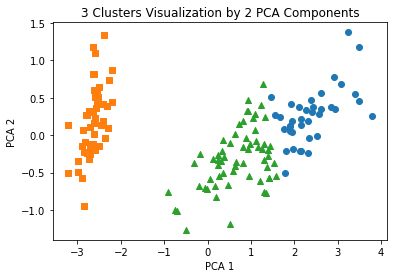

In [11]:
#시각화
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]

#군집값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

#군집값 0,1,2에 따라 시각화
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'],marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'],marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

C:\Users\1\anaconda3\envs\virtualtensor3.7\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


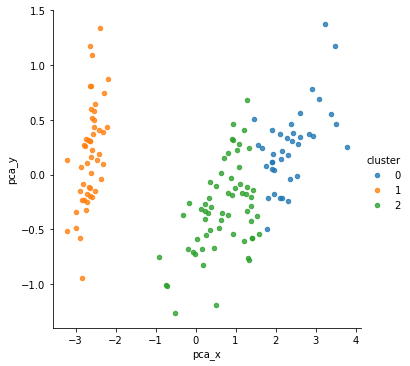

In [14]:
import seaborn as sns

sns.lmplot('pca_x','pca_y', data=irisDF, hue = 'cluster', scatter_kws={"s":20}, fit_reg = False)

In [18]:
'''
    2. 군집화 알고리즘 테스트를 위한 데이터 생성
        - 사이킷런은 군집화 알고리즘 테스트를 위한 데이터 생성기 제공 -> make_blobs(), make_classification()
        - make_blobs()는 개별 군집의 중심점과 표준편차 제어 기능 추가되어있음 ; make_classification()은 노이지를 포함한 데이터를 만드는데 유용하게 사용 ; 둘다 분류기 용도로 데이터 생성 가능
        - 이 외에 make_circle(), make_moon()은 중심기반 군집화로 해결하기 어려운 데이터 세트를 만드는데 사용
        - make_blobs() 사용법
            (i) 호출 파라미터 : n_samples(생성할 총 데이터 개수, 디폴트 100), n_features(데이터 피처 개수), centers(int값으로 군집의 개수, ndarray로 나타낼 경우 각 군집 중심점의 좌표), cluster_std(생성될 군집데이터의 표준편차, 리스트로 각 군집의 표준편차 설정가능 (ex)[0.7,1.2,1.5]) 
            (ii) 피터 데이터세트와 가킷 데이터세트가 튜플로 반환
'''

from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

#y target 값의 분포 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [19]:
#데이터 프레임으로 변경

clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target'] = y
clusterDF.head()

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


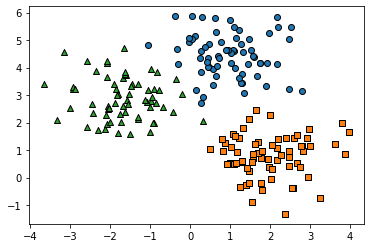

In [20]:
#시각화해보면
target_list = np.unique(y)
markers=['o','s','^','P','D','H','x']
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()

In [26]:
#KMeans 객체를 이용, X데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=200,random_state=0)
cluster_labels=kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels
clusterDF.kmeans_label

0      2
1      0
2      0
3      2
4      0
      ..
195    1
196    2
197    1
198    0
199    1
Name: kmeans_label, Length: 200, dtype: int32

In [28]:
# kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=200,random_state=0)
# kmeans.fit(X)
# clusterDF['kmeans_label2'] = kmeans.labels_
# clusterDF.kmeans_label2 

#동일한 결과

0      2
1      0
2      0
3      2
4      0
      ..
195    1
196    2
197    1
198    0
199    1
Name: kmeans_label2, Length: 200, dtype: int32

In [29]:
#개별 클러스터의 중심위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

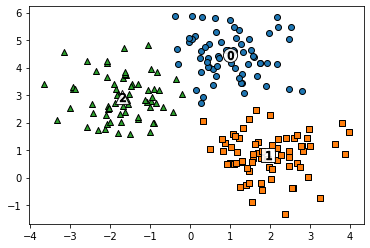

In [32]:
markers=['o','s','^','P','D','H','x']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'], edgecolor='k',marker=markers[label])
    
    #군집별 중심위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',alpha=0.9,edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',marker='$%d$'%label)
    
plt.show()
                                                                                                   

In [34]:
#정확도 확인
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

#나름 잘 분류 되었음을 확인

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64


In [4]:
'''
II. 군집평가
    - (비지도학습의 경우) 군집화의 성능을 평가하는 대표적인 방법으로 실루엣 분석 이용
    
    1. 실루엣 분석의 개요
        - 실루엣 분석은 각 군집간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄
        - 실루엣 계수는 개별 데이터가 가지고 있는 군집화 지표로서 해당 데이터가 같은 군집내의 데이터와 얼마나 가깝게 군집화되어있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼있는지를 나타냄
        - i번째 데이터 포인트의 실루엣 계수 s(i) = (b(i) - a(i))/MAX(a(i), b(i)), a(i)는 같은 군집 내에 존재하는 데이터와의 평균거리, b(i)는 다른 군집 내에 존재하는 데이터와의 평균거리
        - 실루엣 계수는 -1에서 1사이의 값을 가지며 1로 가까워 질수록 근처의 군집과 멀리 떨어져있음을(효율적으로 군집화가 됐음을) 나타냄
        - 사이킷런에선 sklearn.metrics.silhouette_samples(X, labels, metric='euclidean',**kwds) -> 실루엣 계수 반환, sklearn.metrics.silhouette_score(X, labels, metric='uclidiean', smaple_size=None, **kwrds) -> 전체 실루엣 계수의 평균값 반환
        - 전체 실루엣 계수의 평균값이 1로 가까워질 수록 좋치만, 실루엣 계수의 편차가 심하지 않아야 좋은 군집화

    2. 붓꽃 데이터 세트를 이용한 군집평가
'''
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

#iris의 모든 개별 데이터에 대해 실루엣 계수값 계산
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print(score_samples.shape)


(150,)


In [6]:
#irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

#모든 데이터의 평균 실루엣 계수값을 구함
average_score = silhouette_score(iris.data, irisDF['cluster'])
print(average_score)
irisDF.head()

0.552819012356409


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302


In [8]:
#군집별 실루엣 계수의 평균을 구하면
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.451105
1    0.798140
2    0.417320
Name: silhouette_coeff, dtype: float64

In [61]:
'''
    3. 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법
        - http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html 참고
        - 데이터가 많을 경우 시간이 많이 걸림 + 메모리 과부하 -> sampling필요
'''
#실루엣계수 시각화 함수
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

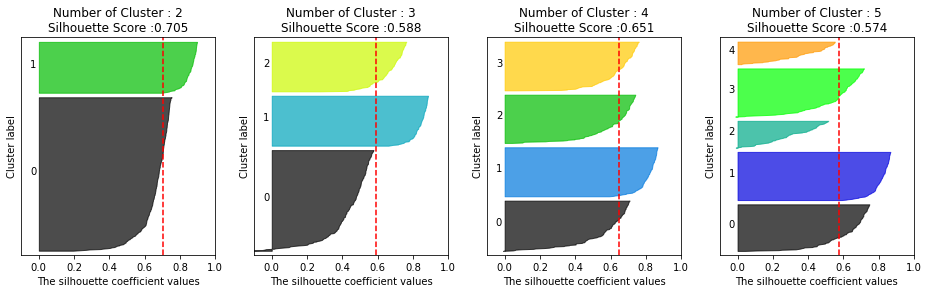

In [10]:
#make_blobs를 통해 데이터 생성 + 실루엣계수 시각화
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0,10.0), shuffle=True, random_state=1)

visualize_silhouette([2,3,4,5],X) # 2,3,4,5개의 군집으로 각각 시각화

#그림을 보면 점선은 실루엣계수 평균을 의미
#Y축은 Cluster label로 맨 왼쪽 그림의 경우 label이 0으로 치우쳐져 있음 + 군집 내에서 실루엣 계수의 편차가 큼
#가장 이상적인 것은 label 비율이 균일하고 실루엣 계수 평균도 높은 cluster=4

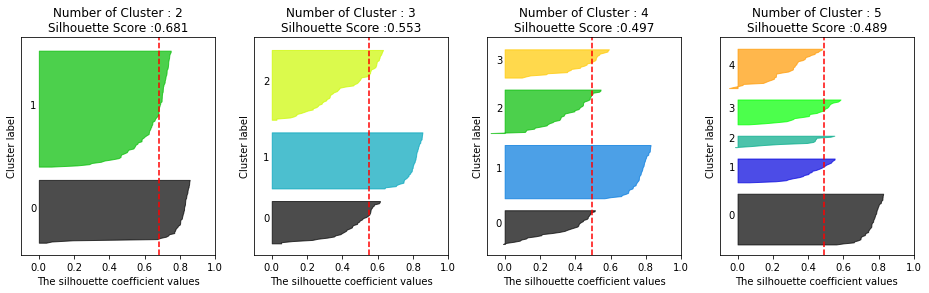

In [11]:
#붓꽃 데이터를 이용, 최적 군집개수를 알아보면
visualize_silhouette([2,3,4,5], iris.data)

#cluster=3일 때 label 비율이 균일하긴 하지만 실루엣 계수의 편차가 매우 큼 -> cluster=2가 적절해보임

In [13]:
'''
    III. 평균이동
        1. 평균이동(Mean shift)의 개요
            - K평균과 같이 중심을 군집의 중심으로 지속적으로 이동시키면수 군집화 수행 but 평균거리중심으로 이동하는 K평균과 달리 평균이동은 중심을 데이터가 모여있는 밀도가 가장 높은 곳으로 이동
            - 밀도 중심으로 이동하기 위해 주변 데이터와의 거리를 KDE(Kernel Density Estimation)의 값으로 입력, 반환된 값을 현재위치에서 업데이트하면서 확률밀도함수의 중심으로 이동
            - KDE는 개별 데이터셋에 커널함수(보통 가우시안함수)를 적용 -> 적용된 커널함수를 모두 더해 데이터의 분포를 나타냄
            - 수식으로 나타내면 KDE = [∑Ki(x - xi)]/n = [∑K{(x - xi)/h}]/nh, x는 확률변수, xi는 관측값, h는 대역폭(bandwidth) ; h는 KDE형태를 부드럽게 만드는 평활화에 사용되며 h를 어떻게 설정하느냐에 따라 KDE의 형태가 달라짐 h가 높을 수록 과도한 평활화가 발생  
            - h가 커질수록(작을수록) 크게(작게) 평활화 -> 적은(많은) 군집 중심점
            - 따라서 Meanshift 클래스의 가장 중요한 파라미터는 bandwidth이며, 사이킷런은 최적의 대역폭 게산을 위해 estimate_bandwidth()함수를 제공

            - 장점: 데이터세트의 형태에 대한 가정, 분포도에 대한 가정이 필요 X, 이상치의 영향력이 크지 않음 + 군집의 개수를 정할 필요 X
            - 단점 : 수행시간이 오래걸림, bandwidth의 영향력이 큼 -> 데이터분석보다는 컴퓨터 비전(이미지, 영상 등)영역에서 더 많이 활용
'''
#make_blobs()를 통한 평균이동군집화 적용 예제
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8) #bandwidth=0.8일때
cluster_labels = meanshift.fit_predict(X)
print('cluster labels :', np.unique(cluster_labels))


cluster labels : [0 1 2 3 4 5]


In [15]:
#bandwidth=1.0일 때 평균이동 군집화
meanshift=MeanShift(bandwidth=1)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels :', np.unique(cluster_labels)) # 3개로 적당하게 군집화 됨

cluster labels : [0 1 2]


In [16]:
# bandwidth 최적화
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 최적값 :', round(bandwidth, 3))

bandwidth 최적값 : 1.816


In [18]:
# estimate_bandwidth(X)로 측정된 bandwidth를 적용해 군집화 수행
import pandas as pd
clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target'] = y

best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels :', np.unique(cluster_labels))

cluster labels : [0 1 2]


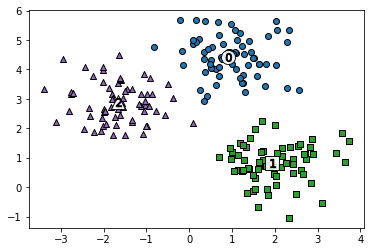

In [24]:
#시각화
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_labels'] = cluster_labels
centers = meanshift.cluster_centers_
unique_lables = np.unique(cluster_labels)
markers=['o','s','^','x','*']

for label in unique_lables:
    label_cluster = clusterDF[clusterDF['meanshift_labels']==label]
    center_x_y = centers[label]
    
    #산점도
    plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],edgecolor='k',marker=markers[label])
    
    #중심표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',alpha=0.9,edgecolor='k',marker=markers[label]) #값이 입력되는 테두리 생성
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, edgecolor='k',marker = '$%d$' %label) #값 입력
    
plt.show()
    

In [27]:
#target값과 label값 비교
print(clusterDF.groupby('target')['meanshift_labels'].value_counts()) #매칭이 잘 됐음을 확인

target  meanshift_labels
0       0                   67
1       1                   67
2       2                   66
Name: meanshift_labels, dtype: int64


In [29]:
'''
IV. GMM(Gaussian Mixture Model) 군집화
    - GMM 군집화는 군집화를 적용하고자 하는 데이터가 여러개의 가우시안 분포를 가진 데이터 집합들이 섞어서 생성된 것이라는 가정하에 확률 기반 군집화를 수행하는 방식
    - 서로다른 정규분포 A + B + C 가 섞임 -> 다 더하면 울퉁불퉁한 분포 생성; 데이터 분석에서는 개별 데이터의 정규분포 곡선을 추출하고, 각 데이터가 어느 정규분포에 속하는지 결정
    - 이와 같은 방식을 모수 추정이라고 하는데 다음 두가지를 추정
        (i) 개별 정규분포의 평균과 분산
        (ii) 각 데이터가 어떤 정규분포에 해당되는지의 확률
    - 이러한 모수 추정을 위해 GMM은 EM(Expectation and Maximization) 방법을 적용
    
    1. GMM을 이용한 붓꽃 데이터 세트 군집화
'''
#평균거리기반 K-평균과 확률기반 GMM 비교
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

iris = load_iris()
feature_names = ['speal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target


In [30]:
#GMM 시행; GMM의 가장 중요한 파라미터는 n_components로 K평균의 n_clusters와 유사
from sklearn.mixture import GaussianMixture

gmm  = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

#군집화 결과 저장
irisDF['gmm_cluster'] = gmm_cluster_labels

print(irisDF.groupby('target')['gmm_cluster'].value_counts())

target  gmm_cluster
0       0              50
1       1              45
        2               5
2       2              50
Name: gmm_cluster, dtype: int64


In [31]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

#GMM은 K평균보다 더 효과적으로 분류를 시행했음을 확인

target  kmeans_cluster
0       1                 50
1       2                 48
        0                  2
2       0                 36
        2                 14
Name: kmeans_cluster, dtype: int64


In [1]:
'''
    2. GMM과 K평균 비교
        - K평균은 원형의(make_blob으로 만든 데이터셋모양) 데이터는 잘 분류하지만 타원형의 데이터는 잘 구분하지 못함
        - GMM은 K평균보다 유연 but 수행시간이 오래걸릴 수 있음
'''
#클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

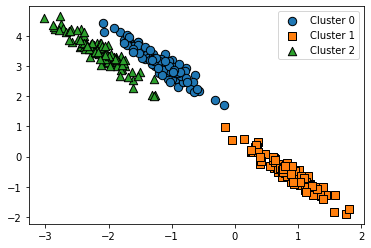

In [40]:
from sklearn.datasets import make_blobs

#원형의 Dataset
X,y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

#타원형으로 변환
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1','ftr2'])
clusterDF['target'] = y

#생성된 데이터를 군집화없이 target값으로 시각화
visualize_cluster_plot(None, clusterDF, 'target',iscenter=False)

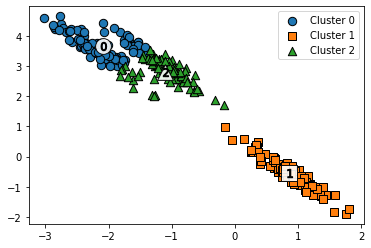

In [44]:
# K평균 군집화 수행
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)

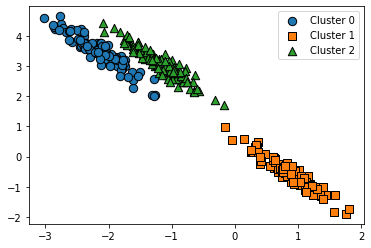

In [47]:
#GMM으로 군집화 시행
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit_predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

#GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter는 False
visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)

In [53]:
'''
V. DBSCAN(Density Based Spatial Clustering of Applications with Noise)
    1. DBSCAN 개요
        - 밀도 기반 군집화의 대표격 알고리즘, 쉽고 직관적, 기하하적으로 복잡한 데이터세트에도 효과적인 군집화 가능
        - 등고선 모양의 clustering은 GMM이나 K평균으로 하기 힘든데 DBSCAN은 이를 가능하게 함
        - 주요 parameter는 epsilon : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역, min points : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수
        - 입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족 시키는가 아닌가에 따라 데이터 포인트를 다음과 같이 정의
            (i) 핵심 포인트(Center Point) : 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있는 경우
            (ii) 이웃 포인트(Neighbor Point) : 주변 영역 내에 위치한 타 데이터를 의미
            (iii) 경계 포인트(Border Point) : 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터
            (iv) 잡음 포인트(Noise Point) : 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터
        - 군집화 방식은 핵심포인트 선별 -> 이웃포인트까지 군집화 -> 경계포인트로 외곽 형성(사진 참고)

    2. DBSCAN 적용하기
'''
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8,metric='euclidean') #min_samples는 자가자신을 포함
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_label'] = dbscan_labels

print(irisDF.groupby('target')['dbscan_label'].value_counts())

#군집 레이블이 -1인것은 노이즈에 속하는 군집 -> 엄밀히 말하면 2개의 군집을 군집화된 것

target  dbscan_label
0        0              49
        -1               1
1        1              46
        -1               4
2        1              42
        -1               8
Name: dbscan_label, dtype: int64


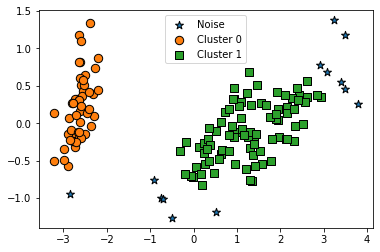

In [54]:
# PCA로 변환 뒤 시각화
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_label',iscenter=False)

#일반적으로 eps가 커지면 노이즈 데이터 개수는 작아지고 min_samples가 커지면 노이즈 데이터 개수는 커짐

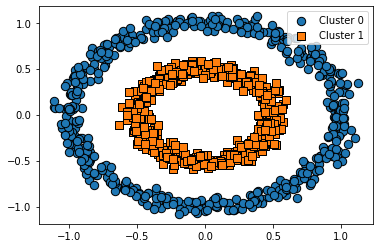

In [3]:
'''
    3. DBSCAN 적용하기 - make_circles() 데이터세트
'''
from sklearn.datasets import make_circles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#make_circles()함수는 오직 2개 피처만을 생성, noise는 노이즈 데이터세트의 비율, factor는 외부원과 내부원의 scale 비율
X,y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

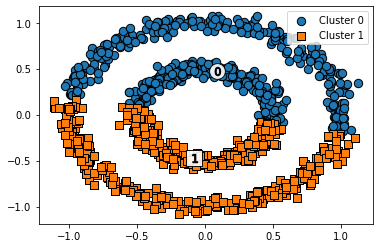

In [4]:
#Kmeans로 make_cirlces() 군집화
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

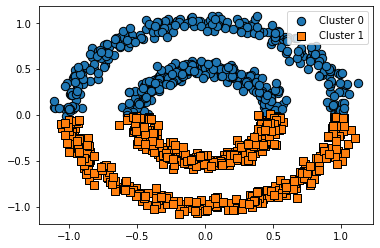

In [5]:
#GMM으로 make_circles() 군집화
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

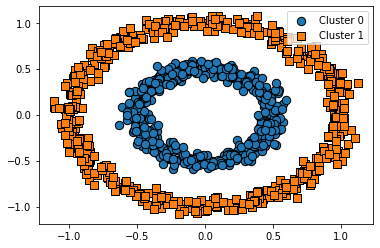

In [8]:
# DBSCAN으로 군집화 적용
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_label'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_label', iscenter=False)

In [9]:
'''
6. 군집화 실습 - 고객 세그먼테이션
    1. 고객 세그먼테이션의 정의와 기법
         - 다양한 기준으로 고객을 분류하는 기법
         - 고객 세그먼테이션은 고객의 어떤 요소를 기반으로 군집화할것인지가 중요한데 여기서는 RFM(Recency: 가장 최근 상품 구입일에서 오늘까지의 시간, Frequency: 상품구매횟수, Monetary Value: 총 구매금액)기법 이용
    
    2. 데이터 세트 로딩과 데이터 클렌징
        - http://archive.ics.uci.edu/ml/datasets/online+retail -> Data Folder -> Online Retail.xlsx
'''
import math
import datetime

retail_df = pd.read_excel('Online Retail.xlsx')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [12]:
# Null값 제외 + 전체적인 정제
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
print(retail_df['Country'].value_counts())

#주문 국가는 영국이 대부분이므로 영국을 제외하고 모두 삭제
retail_df = retail_df[retail_df['Country'] =='United Kingdom']

United Kingdom    354321
Name: Country, dtype: int64


In [16]:
# RFM 기반 데이터 가공

#주문 금액 데이터 생성
retail_df['sale_amount'] = retail_df['Quantity']*retail_df['UnitPrice']
#CostomerID int형으로 변경
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [17]:
#Top5 주문 건수와 주문 금액을 가진 고객 데이터추출
print(retail_df['CustomerID'].value_counts().head())
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])

17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: CustomerID, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


In [25]:
# 주문번호 기준의 기존 데이터를 CustomerID 기준으로 변경, RFM 적용

aggregations = {
    'InvoiceDate' : 'max', #R
    'InvoiceNo' : 'count', #F
    'sale_amount' : 'sum' #M
}
cust_df = retail_df.groupby('CustomerID').agg(aggregations)
cust_df = cust_df.rename(columns={'InvoiceDate' : 'Receny', 'InvoiceNo':'Frequency','sale_amount':'Monetary'})
cust_df = cust_df.reset_index()
cust_df

,CustomerID,Receny,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73
3,12749,2011-12-06 09:56:00,199,4090.88
4,12820,2011-12-06 15:12:00,59,942.34
...,...,...,...,...
3915,18280,2011-03-07 09:52:00,10,180.60
3916,18281,2011-06-12 10:53:00,7,80.82
3917,18282,2011-12-02 11:43:00,12,178.05
3918,18283,2011-12-06 12:02:00,756,2094.88


In [29]:
# 현재 날짜를 2011년 12월 10일로 간주하고 Recency 계산
cust_df['Recency'] = datetime.datetime(2011,12,10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
cust_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73
3,12749,4,199,4090.88
4,12820,4,59,942.34


(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <BarContainer object of 10 artists>)

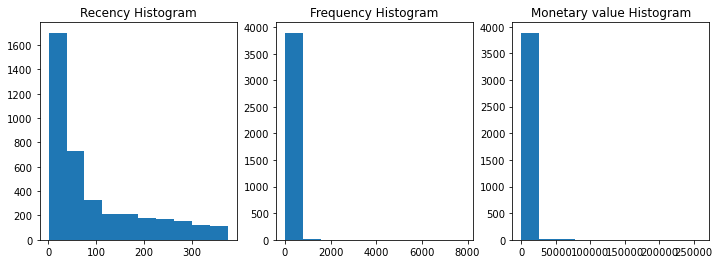

In [57]:
#각 칼럼값의 분포 확인
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary value Histogram')
ax3.hist(cust_df['Monetary'])

In [58]:
#데이터의 왜곡이 심함을 확인
#데이터값 통계치 확인
cust_df.describe()

,CustomerID,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000,3920.000000
mean,15562.059694,92.742092,90.388010,1864.385601
std,1576.594671,99.533485,217.808385,7482.817477
min,12346.000000,1.000000,1.000000,3.750000
25%,14208.750000,18.000000,17.000000,300.280000
50%,15569.500000,51.000000,41.000000,652.280000
75%,16913.250000,143.000000,99.250000,1576.585000
max,18287.000000,374.000000,7847.000000,259657.300000


In [60]:
#왜곡정도가 높으면 K평균은 변별력이 떨어짐
#표준화 후 K평균을 시행해보면
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어 :', silhouette_score(X_features_scaled, labels))

실루엣 스코어 : 0.5924537813510861


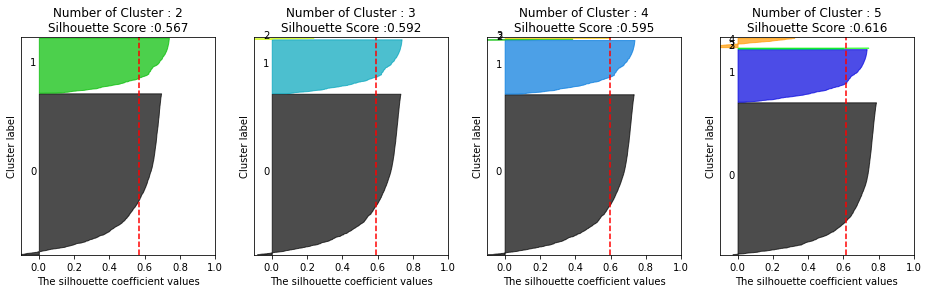

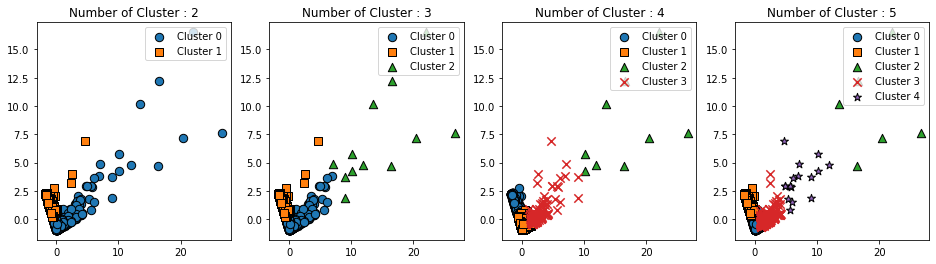

In [62]:
#K-평균의 n_clusters 값 별로 군집화를 시각화해주는 함수 생성
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled) 

#군집개수가 커져도 군집의 효율성은 증가하지 X

실루엣 스코어는 : 0.303


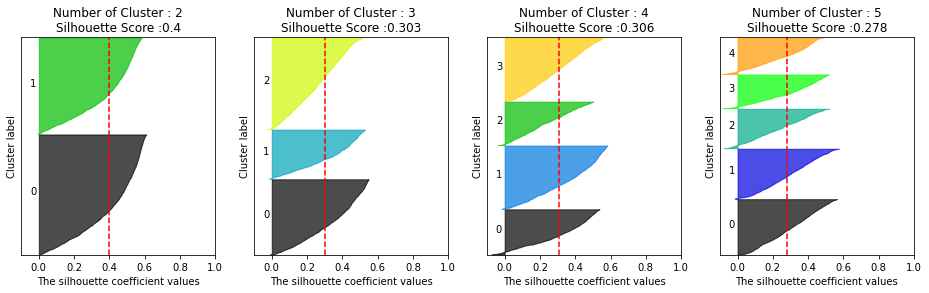

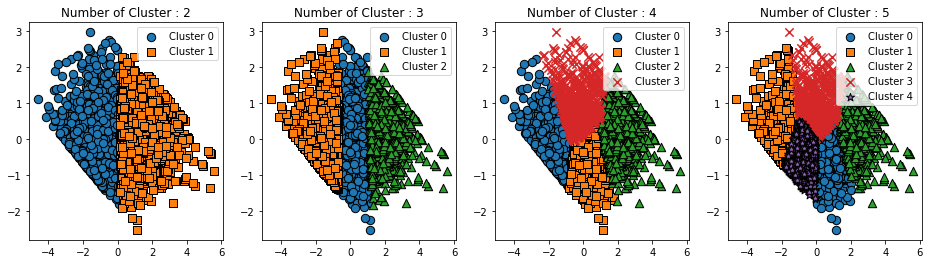

In [63]:
#로그 변환 후 K평균 군집화
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

#실루엣 스코어는 떨어지지만 군집은 더 균일하게 잘 되었음